<a href="https://colab.research.google.com/github/mx5nabcd/mnist_clone/blob/main/mnist_clone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 클론 코딩은 아래의 링크에서 12번 박스부터 참고함
# https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

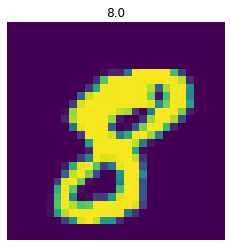

In [4]:
# Prepare Dataset
# load data
train = pd.read_csv('/content/drive/MyDrive/colab_data/mnist/train.csv',dtype=np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != 'label'].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,targets_numpy,test_size=0.2,random_state=42)

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis('off')
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [5]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    # Linear part
    self.linear = nn.Linear(input_dim, output_dim)
    # There should be logistic function right?
    # However logistic function in pytorch is in loss function
    # So actually we do not forget to put it, it is only at next parts

  def forward(self, x):
      out = self.linear(x)
      return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# Training the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    # Define variables
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    # Clear gradients
    optimizer.zero_grad()

    # Forward propagation
    outputs = model(train)

    # Calculate softmax and cross entropy loss
    loss = error(outputs, labels)

    # Calculate gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1

    # Prediction
    if count % 50 == 0:
      # Calculate Accuracy
      correct = 0
      total = 0
      # Predict test dataset
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))

        # Forward propagation
        outputs = model(test)

        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]

        # Total number of labels
        total += len(labels)

        # Total correct predictions
        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      # store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
    if count % 500 == 0:
      # Print Loss
      print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8202061653137207 Accuracy: 70.25%
Iteration: 1000 Loss: 1.595628023147583 Accuracy: 77.22618865966797%
Iteration: 1500 Loss: 1.2865469455718994 Accuracy: 79.23809814453125%
Iteration: 2000 Loss: 1.188147783279419 Accuracy: 80.51190185546875%
Iteration: 2500 Loss: 1.029341220855713 Accuracy: 81.42857360839844%
Iteration: 3000 Loss: 0.9321669936180115 Accuracy: 82.14286041259766%
Iteration: 3500 Loss: 0.8939138054847717 Accuracy: 82.6547622680664%
Iteration: 4000 Loss: 0.757581889629364 Accuracy: 83.14286041259766%
Iteration: 4500 Loss: 0.9758657813072205 Accuracy: 83.54762268066406%
Iteration: 5000 Loss: 0.8002362251281738 Accuracy: 83.83333587646484%
Iteration: 5500 Loss: 0.7475889325141907 Accuracy: 84.08333587646484%
Iteration: 6000 Loss: 0.8748824596405029 Accuracy: 84.4047622680664%
Iteration: 6500 Loss: 0.6624706387519836 Accuracy: 84.61904907226562%
Iteration: 7000 Loss: 0.7194094061851501 Accuracy: 84.9047622680664%
Iteration: 7500 Loss: 0.6261962652206421

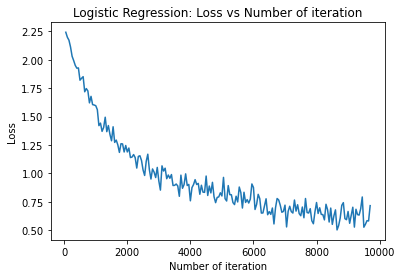

In [7]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel('Number of iteration')
plt.ylabel('Loss')
plt.title('Logistic Regression: Loss vs Number of iteration')
plt.show()

In [9]:
# Create ANN Model
class ANNModel(nn.Module):

  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()

    # Linear function 1: 784 --> 150
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    # Non-linearity 1
    self.relu1 = nn.ReLU()

    # Linear function 2: 150 --> 150
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    # Non-linearity 2
    self.tanh2 = nn.Tanh()

    # Linear function 3: 150 --> 150
    self.fc3 = nn.Linear(hidden_dim, hidden_dim)
    # Non-linearity 3
    self.elu3 = nn.ELU()

    # Linear function 4 (readout): 150 --> 10
    self.fc4 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    # Linear function 1
    out = self.fc1(x)
    # Non-linearity 1
    out = self.relu1(out)

    # Linear function 2
    out = self.fc2(out)
    # Non-linearity
    out = self.tanh2(out)

    # Linear function 3
    out = self.fc3(out)
    # Non-linearity 3
    out = self.elu3(out)

    # Linear function 4 (readout)
    out = self.fc4(out)
    return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    # Clear gradients
    optimizer.zero_grad()
    
    # Forward propagation
    outputs = model(train)

    # Calculate softmax and ross entropy loss
    loss = error(outputs, labels)

    # Calculating gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1

    if count % 50 == 0:
      # Calculate Accuracy
      correct = 0
      total = 0
      # Predict test dataset
      for images, labels in test_loader:

        test = Variable(images.view(-1, 28*28))

        # Forward propagation
        outputs = model(test)

        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]

        # Total number of labels
        total += len(labels)

        # Total correct predictions
        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      # store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count % 500 == 0:
      # Pinrt Loss
      print('Iteration: {} Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.4086884558200836  Accuracy: 87.26190185546875 %
Iteration: 1000 Loss: 0.3528091013431549  Accuracy: 89.44047546386719 %
Iteration: 1500 Loss: 0.17107819020748138  Accuracy: 90.61904907226562 %
Iteration: 2000 Loss: 0.25611886382102966  Accuracy: 91.46428680419922 %
Iteration: 2500 Loss: 0.2825053036212921  Accuracy: 92.58333587646484 %
Iteration: 3000 Loss: 0.09665177017450333  Accuracy: 92.92857360839844 %
Iteration: 3500 Loss: 0.23017358779907227  Accuracy: 93.52381134033203 %
Iteration: 4000 Loss: 0.06083957850933075  Accuracy: 94.0952377319336 %
Iteration: 4500 Loss: 0.2969220280647278  Accuracy: 94.5 %
Iteration: 5000 Loss: 0.09385480731725693  Accuracy: 94.58333587646484 %
Iteration: 5500 Loss: 0.17863410711288452  Accuracy: 94.69047546386719 %
Iteration: 6000 Loss: 0.19653549790382385  Accuracy: 94.91666412353516 %
Iteration: 6500 Loss: 0.08703262358903885  Accuracy: 95.38095092773438 %
Iteration: 7000 Loss: 0.11357900500297546  Accuracy: 95.78571319580078